In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/개발_전처리/백엔드개발.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,Who We AreSaaS Platform 팀은 SSPSupplySide Platf...,하나 이상의 서버 프로그래밍 언어에 능숙합니다 테스트하기 좋은 코드를 작성합니다 ...
1,VitalCare의 벡엔드 시스템 설계 및 개발 Python Golang을 이용한...,Python 또는 Golang을 활용한 백엔드 개발 경험이 5년 이상 또는 그에 ...
2,VAN 서버 관리VAN 다중화가상계좌 연동결제수단 관리 시스템,관련 업무 최소 4년 이상대규모 시스템 업무 최소 6년 이상은행 VAN 시스템 업...
3,백엔드 API 개발 및 아키텍쳐링 백엔드 API 개발 및 서비스 개편 DBPostg...,백엔드 업무 경력 5년 이상 보유하신 분 RDB NoSQL 설계 및 활용 능력 N...
4,백엔드 아키텍처 설계 및 개선 MSA 기반의 서비스 개발 프론트엔드백엔드 API ...,Java Spring Framework 기반 실무 개발 경력 5년 이상 주도적으로...
...,...,...
351,프론트엔드백엔드의 설계 구현 운영 및 개발인력의 Lead성능테스트 도구를 활용한 서...,커뮤니케이션커뮤니티커머스 서비스의 서버개발에 대한 높은 이해도 및 경력10년 이상기...
352,채팅 서비스 회원 API 개발 커뮤니티 서비스 회원 API 개발 회원 관련 어드민...,Java 기반 개발 실무경력 REST API Spring Boot 기반 정보통신 ...
353,React Native 앱 개발,새로운 분야에 대한 학습을 두려워하지 않는 개발자커뮤니케이션 및 협업에 능숙한 개발...
354,React Native 앱 개발,새로운 분야에 대한 학습을 두려워하지 않는 개발자커뮤니케이션 및 협업에 능숙한 개발...


In [3]:
#사용할 column 선택
df = df[['자격요건 및 우대사항']]
df

,자격요건 및 우대사항
0,하나 이상의 서버 프로그래밍 언어에 능숙합니다 테스트하기 좋은 코드를 작성합니다 ...
1,Python 또는 Golang을 활용한 백엔드 개발 경험이 5년 이상 또는 그에 ...
2,관련 업무 최소 4년 이상대규모 시스템 업무 최소 6년 이상은행 VAN 시스템 업...
3,백엔드 업무 경력 5년 이상 보유하신 분 RDB NoSQL 설계 및 활용 능력 N...
4,Java Spring Framework 기반 실무 개발 경력 5년 이상 주도적으로...
...,...
351,커뮤니케이션커뮤니티커머스 서비스의 서버개발에 대한 높은 이해도 및 경력10년 이상기...
352,Java 기반 개발 실무경력 REST API Spring Boot 기반 정보통신 ...
353,새로운 분야에 대한 학습을 두려워하지 않는 개발자커뮤니케이션 및 협업에 능숙한 개발...
354,새로운 분야에 대한 학습을 두려워하지 않는 개발자커뮤니케이션 및 협업에 능숙한 개발...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/개발_전처리/백엔드개발(자격요건 및 우대사항).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'자격요건 및 우대사항\n 하나 이상의 서버 프로그래밍 언어에 능숙합니다 테스트하기 좋은 코드를 작성합니다 문제 해결 후 재발 방지를 위한 해법을 고민합니다 REST gRPC 등의 통신 모델을 이해하고 사용성 높은 API 설계 및 개발이 가능합니다 대규모 트래픽의 라이브 서비스 운영 경험이 있습니다 미션 크리티컬 한 서비스 운영 환경에서 높은 책임감으로 안정적인 서비스를 같이 만들어 갑니다 Go 또는 Python 을 능숙하게 사용합니다 헥사고날 아키텍처와 같은 소프트웨어 아키텍처를 적용한 설계를 할 수 있습니다 MySQL DynamoDB Redis Elasticsearch를 높은 수준으로 다룰 수 있습니다 AWS  Kubernetes 등 cloud native 환경에 대해 이해하고 있습니다 Kafka를 활용한 시스템 설계를 할 수 있습니다\n Python 또는 Golang을 활용한 백엔드 개발 경험이 5년 이상 또는 그에 준하는 경험 FastAPI 경험 또는 그에 준하는 프레임워크 경험 MySQL및 MongoDB 를 사용한 데이터베이스 설계 및 구현 경험  MongoDB는 중요도 낮음 테스트 코드 작성 경험 백엔드 아키텍처 설계 및 최적화에 대한 이해 ithub을 통한 CI 및 docker 이미지를 통한 CD 경험 또는 이해 의료 데이터 처리에 대한 경험 및 의료 환경에 대한 지식 우대 테스트 코드 작성 및 테스트 자동화에 익숙 Onpremise 환경 및 Cloud 환경에서의 작업 경험 AWS GCP Azure 등 팀 성장을 고민하시는 분\n 관련 업무 최소 4년 이상대규모 시스템 업무 최소 6년 이상은행 VAN 시스템 업무 경험PG 시스템 업무 경험대규모 시스템 업무 경험Kafka 기반 MSA 업무 경험\n 백엔드 업무 경력 5년 이상 보유하신 분 RDB NoSQL 설계 및 활용 능력 NodeJS GraphQL 프레임워크 활용 능력 Web Socket Message Streaming Service우대사항 대규모 서비스 운영 경험 Optimization 역량 

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['자격',
 '요건',
 '및',
 '우대',
 '사항',
 '하나',
 '이상',
 '서버',
 '프로그래밍',
 '언어',
 '테스트',
 '코드',
 '작성',
 '문제',
 '해결',
 '후',
 '재발',
 '방지',
 '위',
 '해법',
 '고민',
 '등',
 '통신',
 '모델',
 '이해',
 '사용성',
 '설계',
 '및',
 '개발',
 '대규모',
 '트래픽',
 '라이브',
 '서비스',
 '운영',
 '경험',
 '미션',
 '크리티컬',
 '서비스',
 '운영',
 '환경',
 '책임감',
 '안정',
 '서비스',
 '사용',
 '헥',
 '사고',
 '날',
 '아키텍처',
 '소프트웨어',
 '아키텍처',
 '적용',
 '설계',
 '수',
 '를',
 '수준',
 '수',
 '등',
 '환경',
 '대해',
 '이해',
 '를',
 '활용',
 '시스템',
 '설계',
 '수',
 '활용',
 '백엔드',
 '개발',
 '경험',
 '이상',
 '그',
 '준',
 '경험',
 '경험',
 '그',
 '준',
 '프레임워크',
 '경험',
 '및',
 '를',
 '사용',
 '데이터베이스',
 '설계',
 '및',
 '구현',
 '경험',
 '중요도',
 '테스트',
 '코드',
 '작성',
 '경험',
 '백엔드',
 '아키텍처',
 '설계',
 '및',
 '최적화',
 '대한',
 '이해',
 '통한',
 '및',
 '이미지',
 '통한',
 '경험',
 '이해',
 '의료',
 '데이터',
 '처리',
 '대한',
 '경험',
 '및',
 '의료',
 '환경',
 '대한',
 '지식',
 '우대',
 '테스트',
 '코드',
 '작성',
 '및',
 '테스트',
 '자동화',
 '익숙',
 '환경',
 '및',
 '환경',
 '작업',
 '경험',
 '등',
 '팀',
 '성장',
 '고민',
 '분',
 '관련',
 '업무',
 '최소',
 '이상',
 '대규모',
 '시스템',
 '업무',
 '최소',
 '이상'

In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

20602
1254


FreqDist({'분': 1848, '경험': 1788, '개발': 1147, '및': 701, '대한': 468, '서비스': 416, '이상': 387, '경력': 387, '등': 355, '이해': 328, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [11]:
stop_words = [
    '환경','기술','지식','개발','사용','이해','기반','필수','가능','우대','경험','관심','활용','관련','능력','이해도','대한','보유','이상','실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['자격',
 '요건',
 '사항',
 '하나',
 '서버',
 '프로그래밍',
 '언어',
 '테스트',
 '코드',
 '작성',
 '문제',
 '후',
 '재발',
 '방지',
 '해법',
 '고민',
 '통신',
 '모델',
 '사용성',
 '설계',
 '대규모',
 '트래픽',
 '라이브',
 '서비스',
 '운영',
 '미션',
 '크리티컬',
 '서비스',
 '운영',
 '책임감',
 '안정',
 '서비스',
 '헥',
 '사고',
 '날',
 '아키텍처',
 '소프트웨어',
 '아키텍처',
 '적용',
 '설계',
 '를',
 '수준',
 '대해',
 '를',
 '시스템',
 '설계',
 '백엔드',
 '그',
 '준',
 '그',
 '준',
 '프레임워크',
 '를',
 '데이터베이스',
 '설계',
 '구현',
 '중요도',
 '테스트',
 '코드',
 '작성',
 '백엔드',
 '아키텍처',
 '설계',
 '최적화',
 '통한',
 '이미지',
 '통한',
 '의료',
 '데이터',
 '처리',
 '의료',
 '테스트',
 '코드',
 '작성',
 '테스트',
 '자동화',
 '익숙',
 '작업',
 '성장',
 '고민',
 '최소',
 '대규모',
 '시스템',
 '최소',
 '은행',
 '시스템',
 '시스템',
 '대규모',
 '시스템',
 '백엔드',
 '설계',
 '프레임워크',
 '사항',
 '대규모',
 '서비스',
 '운영',
 '역량',
 '설계',
 '역량',
 '실무',
 '주도',
 '백엔드',
 '아키텍쳐',
 '설계',
 '클라우드',
 '서비스',
 '운영',
 '유저',
 '문제점',
 '협업',
 '툴',
 '아키텍처',
 '변경',
 '마이',
 '그레이',
 '션',
 '학습',
 '것',
 '공유',
 '것',
 '실무',
 '웹',
 '서비스',
 '운영',
 '실제',
 '서비스',
 '기획',
 '배포',
 '운영',
 '모든',
 '과정',
 '설계',
 '운영',
 '설계',
 '운영',
 '신분'

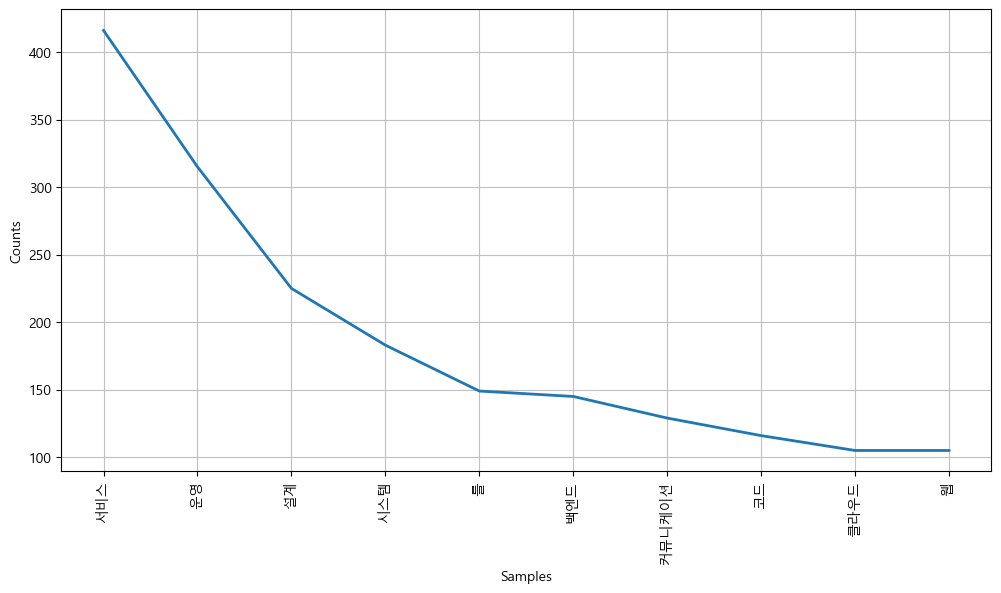

In [12]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

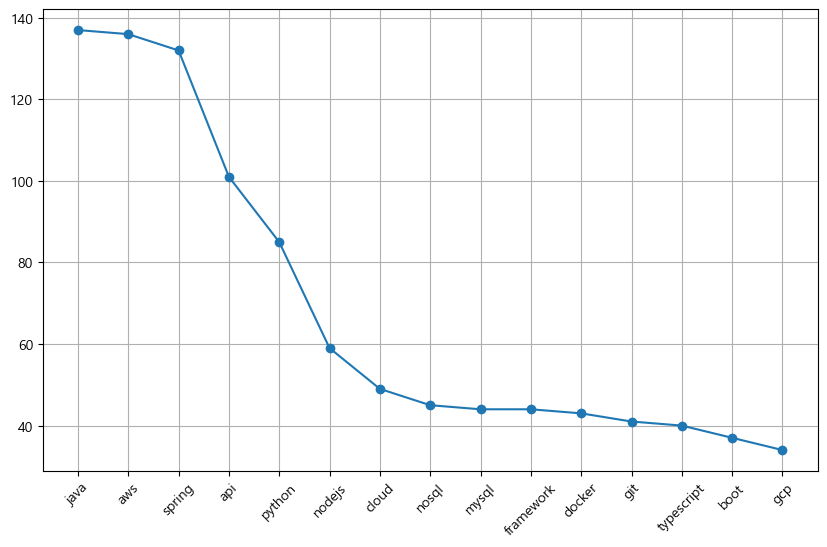

In [29]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['restful']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)